# CS 480/680 assignment 1 (coding part)


- Please save a copy of this notebook to avoid losing your changes.
- Debug your code and ensure that it can run before submission.
- Save the output of each cell. Failure to do so may result in your coding questions not being graded.
- Submit your completed version of this notebook.



## Question 1-2

In this question, you are asked to implement the perceptron algorithm on the Spambase dataset. Please refer to the [dataset webpage](https://archive.ics.uci.edu/ml/datasets/spambase) for details on the dataset, and consult the lecture slides and suggested readings for details on the perceptron algorithm.

- Please note that `is_spam` is the label of the dataset. The labellings are 0/1 instead of -1/1 (which was used for the perceptron covered in class).
- Recording the accuracy after every step may be costly, therefore you can instead record the accuracy every $x$ steps, where $x$ can be 100, 1000, your training set size, 4601 (the size of the dataset), or any other value you find appropriate.
- It is recommended that you split the dataset into training/validation/testing datasets, but we will not deduct marks if you don't.
- You will get full marks for 
    - Correct implementation of the perceptron algorithm
    - An accuracy (on the validation dataset, if you splitted the dataset) vs number of training steps plot that relects the progress of the training
    - Final reported accuracy (on the testing dataset, if you splitted the dataset)

In [1]:
import urllib.request
import pandas as pd
# TODO: add any other package you need

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
filename = 'spambase.csv'
urllib.request.urlretrieve(url, filename)

# Load the dataset into a Pandas dataframe
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
    'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
    'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
    'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
    'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;',
    'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'is_spam'
]
data = pd.read_csv(filename, names=column_names)


In [2]:
import numpy as np

In [3]:
# random shuffle of data
seed = 10
np.random.seed(seed=seed)

data_shuffled = data.iloc[np.random.permutation(len(data))]
data = data_shuffled.reset_index(drop=True)

In [4]:
# perceptron uses +1, -1 instead of 0, 1. So well convert 0 to -1
data.loc[data["is_spam"] == 0, "is_spam"] = -1

In [5]:
# split dataset into training, validation, testing
train_split_pct, val_split_pct = 0.8, 0.1
num_train_ex, num_val_ex = int(len(data) * train_split_pct), int(len(data) * val_split_pct)

train_idx = num_train_ex
val_idx = num_train_ex + num_val_ex

train_data, val_data, test_data = data[:train_idx], data[train_idx:val_idx], data[val_idx:]
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [6]:
def calculate_acc(dataset, w, b):
    correct = 0
    for i in range(len(dataset)):
        x = dataset.loc[i, dataset.columns != "is_spam"].values
        y = dataset.iloc[i]["is_spam"]

        if np.sign(y) == np.sign(np.dot(w, x) + b):
            correct += 1
    
    return correct / len(dataset)


In [7]:
# TODO: your implementation
def perceptron_train(train_dataset, val_dataset, epochs = 1000, report_each=100):
    #init params
    w = [0] * (train_dataset.shape[1] - 1) # b/c target is not included
    b = 0
    validation_accs = []
    training_accs = []

    target = "is_spam"

    for epoch in range(epochs):
        print(epoch)
        for index in range(len(train_dataset)):
            # get random index
            #index = np.random.randint(0, len(train_dataset))

            y = train_dataset.iloc[index][target]
            x = train_dataset.loc[index, train_dataset.columns != target].values
            
            if y * (np.dot(x, w) + b) <= 0:
                w = w + y*x
                b = b + y
            
            if index % report_each == 0:
                training_accs.append(calculate_acc(train_dataset, w, b))
                validation_accs.append(calculate_acc(val_dataset, w, b))
        
    return w, b, training_accs, validation_accs


In [8]:
epochs = 50
report_each = 1000
w, b, train_accs, val_accs = perceptron_train(train_dataset=train_data, val_dataset=val_data, epochs=epochs, report_each=report_each)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [9]:
import matplotlib.pyplot as plt

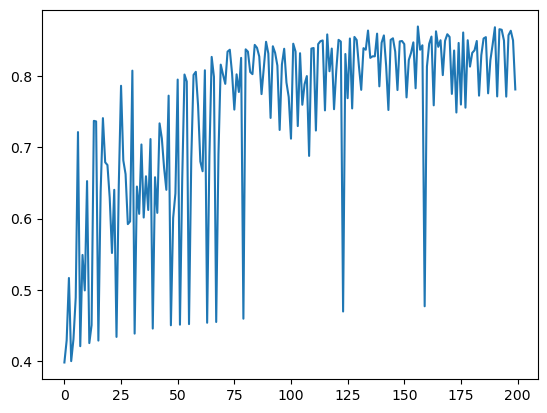

In [10]:
# plot training acc
plt.plot([i for i in range(len(train_accs))], train_accs)

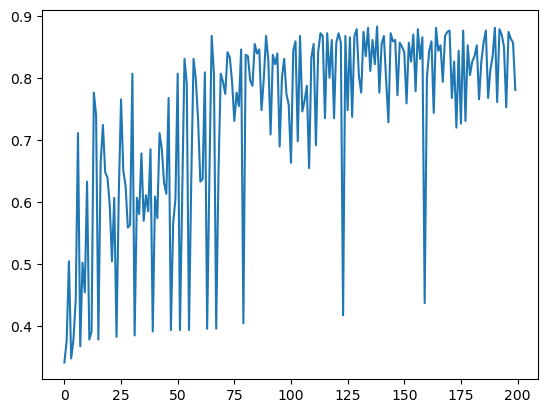

In [11]:
plt.plot([i for i in range(len(val_accs))], val_accs)

In [12]:
# TODO: plot the accuracy against the number of steps
# TODO: report the final accuracy

In [13]:
print(f"Test data accuracy: {calculate_acc(test_data, w, b)}")

Test data accuracy: 0.8806941431670282
